# AIR Quality UCI

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

### Wczytanie danych

In [39]:
df = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', sep=";", usecols=list(range(15)))

In [40]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


### Zmienne

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in °C
13. Relative Humidity (%)
14. AH Absolute Humidity

### Analiza kompletności danych

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [ ]:
# df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H.%M.%S")

In [45]:
object_cols = [col for col in df.columns[2:] if df[col].dtype == object]

In [46]:
object_cols

['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

In [47]:
for col in object_cols: 
    df[col] = df[col].str.replace(',','.').astype(float)

In [48]:
len(df)

9471

In [49]:
len(df.dropna())

9357

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [51]:
df = df.dropna()

In [52]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### -200 oznacza brak danych

In [53]:
import numpy as np

In [54]:
for col in df.columns:
    if df[col].dtype != object:
        df.loc[df[col] == -200, col] = np.nan

In [55]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [56]:
df = df.dropna()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           827 non-null    object 
 1   Time           827 non-null    object 
 2   CO(GT)         827 non-null    float64
 3   PT08.S1(CO)    827 non-null    float64
 4   NMHC(GT)       827 non-null    float64
 5   C6H6(GT)       827 non-null    float64
 6   PT08.S2(NMHC)  827 non-null    float64
 7   NOx(GT)        827 non-null    float64
 8   PT08.S3(NOx)   827 non-null    float64
 9   NO2(GT)        827 non-null    float64
 10  PT08.S4(NO2)   827 non-null    float64
 11  PT08.S5(O3)    827 non-null    float64
 12  T              827 non-null    float64
 13  RH             827 non-null    float64
 14  AH             827 non-null    float64
dtypes: float64(13), object(2)
memory usage: 103.4+ KB


In [65]:
ground_truth_cols = [col for col in df.columns if '(GT)' in col]
sample_cols = [col for col in df.columns[2:] if col not in ground_truth_cols]

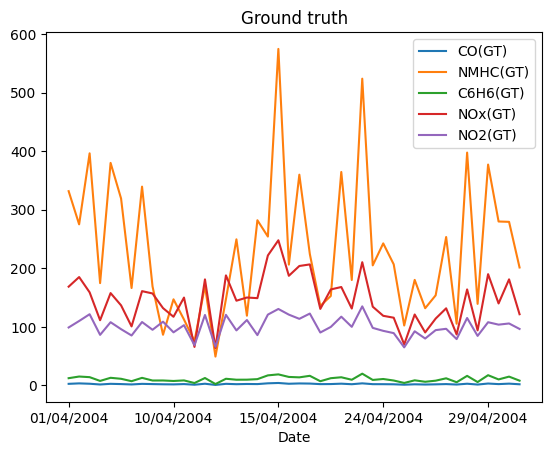

In [68]:
df.groupby(by='Date')[ground_truth_cols].mean().plot(title='Ground truth')
plt.show()

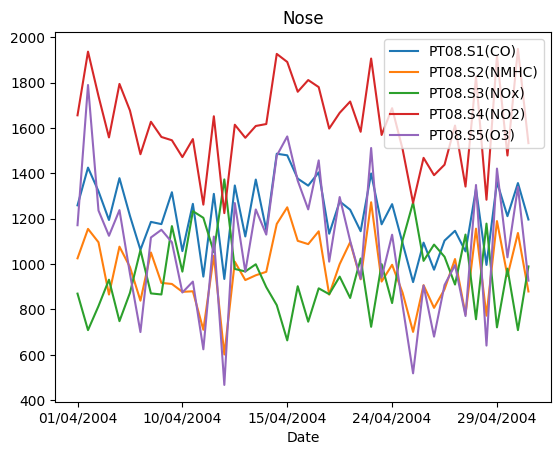

In [70]:
df.groupby(by='Date')[sample_cols[:-3]].mean().plot(title='Nose')
plt.show()

### Zbiory treningowy, walidacyjny i testowy

In [71]:
X = df[sample_cols]
y = df['C6H6(GT)']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [86]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

## Analiza korelacji

In [87]:
import seaborn as sns

#### Analiza korelacji pomiędzy odczytami ze stacji referencyjnej

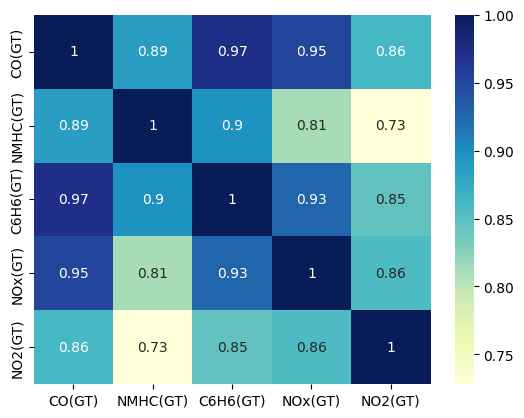

In [88]:
sns.heatmap(df[ground_truth_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

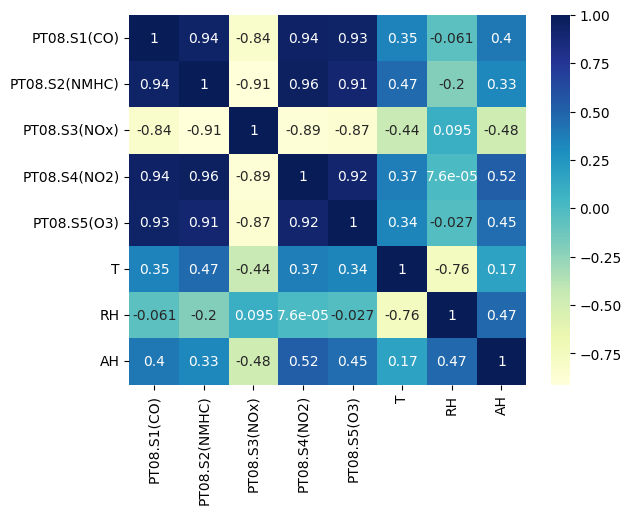

In [89]:
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Regresja liniowa

In [90]:
from sklearn.linear_model import LinearRegression

In [93]:
X_train.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
134,1541.0,1185.0,770.0,1889.0,1407.0,11.7,63.7,0.8719
1086,967.0,661.0,1181.0,1321.0,463.0,12.2,66.8,0.9455
176,1064.0,787.0,1057.0,1407.0,1115.0,14.8,52.1,0.8686
461,900.0,643.0,1339.0,1089.0,455.0,12.4,31.9,0.4583
332,1170.0,1009.0,879.0,1566.0,872.0,16.6,35.6,0.6697


In [92]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [81]:
reg.score(X_val, y_val)

0.9893117806790925

In [94]:
?reg.score

Signature: reg.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination of the prediction.

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outp

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [96]:
?mean_absolute_error

Signature:
mean_absolute_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
)
Docstring:
Mean absolute error regression loss.

Read more in the :ref:`User Guide <mean_absolute_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'}  or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

Returns
-------
loss : float or ndarray 

In [97]:
y_val_reg = reg.predict(X_val)

MAE

In [98]:
mean_absolute_error(y_val, y_val_reg)

0.5706621411469339

MSE

In [99]:
mean_squared_error(y_val, y_val_reg)

0.6072423575897752

RMSE

In [100]:
mean_squared_error(y_val, y_val_reg, squared=False)

0.7792575681953786

### Drzewo decyzyjne

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [103]:
tree.score(X_val, y_val)

0.9996728762739114

In [104]:
y_val_tree = tree.predict(X_val)

In [165]:
def compare(X, y, *models):
    longest_name = max([len(model.__class__.__name__) for model in models])
    num_tabs = longest_name // 6 
    print("".join(['\t'] * num_tabs) + 'R^2\tMAE\tMSE\tRMSE')
    for model in models:
        y_pred = model.predict(X)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = mean_squared_error(y, y_pred, squared=False)
        score = model.score(X, y)
        print(f"{model.__class__.__name__}\t{score:.4f}\t{mae:.4f}\t{mse:.4f}\t{rmse:.4f}")

In [166]:
compare(X_val, y_val, reg, tree)

			R^2	MAE	MSE	RMSE
LinearRegression	0.9907	0.5707	0.6072	0.7793
DecisionTreeRegressor	0.9997	0.0573	0.0215	0.1465


## Wybór zmiennych na podstawie drzewa decyzyjnego

In [128]:
tree.feature_importances_

array([1.01574600e-05, 9.99825500e-01, 7.02660484e-06, 4.68333940e-05,
       6.58422838e-05, 3.56454362e-06, 1.23172736e-05, 2.87589025e-05])

### SelectFromMocel

* Cechy są uważane za nieistotne i usuwane, jeśli odpowiadająca im ważność jest poniżej podanego progu.
* Oprócz numerycznego określania progu istnieją wbudowane heurystyki do znajdowania progu na podstawie średniej lub mediany i ich zmiennoprzecinkowych wielokrotności, np. `"0.1*mean"`. 
* Można również ustawić limit liczby cech do wyboru.

In [141]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree, prefit=True)

# przypisanie nazw zmiennym
feature_idx = model.get_support()
feature_name = X_train.columns[feature_idx]

In [142]:
feature_name

Index(['PT08.S2(NMHC)'], dtype='object')

In [150]:
X_small = pd.DataFrame(data=model.transform(X_train.values), columns=feature_name)
X_small.shape           

(620, 1)

In [151]:
X_small.head()

,PT08.S2(NMHC)
0,1185.0
1,661.0
2,787.0
3,643.0
4,1009.0


In [169]:
reg_small = LinearRegression()
reg_small = reg_small.fit(X_small, y_train)

In [170]:
tree_small = DecisionTreeRegressor()
tree_small = tree_small.fit(X_small, y_train)

In [171]:
compare(X_val, y_val, reg, tree)

			R^2	MAE	MSE	RMSE
LinearRegression	0.9907	0.5707	0.6072	0.7793
DecisionTreeRegressor	0.9997	0.0573	0.0215	0.1465


In [172]:
compare(pd.DataFrame(model.transform(X_val.values), columns=feature_name), y_val, reg_small, tree_small)

			R^2	MAE	MSE	RMSE
LinearRegression	0.9707	1.0379	1.9189	1.3852
DecisionTreeRegressor	0.9999	0.0257	0.0052	0.0722


### Feature selection

Ferri, F. J., Pudil, P., Hatef, M., & Kittler, J. (1994). Comparative study of techniques for large-scale feature selection. In Machine Intelligence and Pattern Recognition (Vol. 16, pp. 403-413). North-Holland.